In [1]:
import pandas as pd

In [2]:
obesity = pd.read_csv('../../data/obesity_final.csv')

In [3]:
# obesity

In [4]:
# pd.set_option('display.max_columns', 100)
# obesity.info()

In [5]:
obesity = obesity.rename(columns={'family_history_with_overweight': 'history'})

# **VARIABLES CATEGÓRICAS**

## Variables categóricas ordinales

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Define el orden de las categorías para cada variable
caec_categories = ['no', 'Sometimes', 'Frequently', 'Always']
calc_categories = ['no', 'Sometimes', 'Frequently', 'Always']
nobeyesdad_categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Inicializa el codificador ordinal
ordinal_encoder = OrdinalEncoder(categories=[caec_categories, calc_categories, nobeyesdad_categories])

# Aplica el codificador ordinal a las columnas específicas
obesity[['caec', 'calc', 'nobeyesdad']] = ordinal_encoder.fit_transform(obesity[['caec', 'calc', 'nobeyesdad']])

# Muestra las primeras filas del DataFrame para verificar los cambios
print(obesity.head())

   gender  age  height  weight history favc  fcvc  ncp  caec smoke  ch2o scc  \
0  Female   21   162.0    64.0     yes   no   2.0  3.0   1.0    no   2.0  no   
1    Male   23   180.0    77.0     yes   no   2.0  3.0   1.0    no   2.0  no   
2    Male   27   180.0    87.0      no   no   3.0  3.0   1.0    no   2.0  no   
3    Male   22   178.0    89.8      no   no   2.0  1.0   1.0    no   2.0  no   
4    Male   29   162.0    53.0      no  yes   2.0  3.0   1.0    no   2.0  no   

   faf  tue  bad_habits  calc                 mtrans  nobeyesdad  
0  0.0  1.0           1   0.0  Public_Transportation         1.0  
1  2.0  1.0           1   2.0  Public_Transportation         1.0  
2  2.0  0.0           1   2.0                Walking         2.0  
3  0.0  0.0           1   1.0  Public_Transportation         3.0  
4  0.0  0.0           1   1.0             Automobile         1.0  


## Variables categóricas nominales

In [7]:
# Mapea las categorías 'yes' y 'no' a 1 y 0 respectivamente
binary_map = {'yes': 1, 'no': 0}

# Aplica la codificación a las columnas específicas
obesity['history'] = obesity['history'].map(binary_map)
obesity['favc'] = obesity['favc'].map(binary_map)
obesity['smoke'] = obesity['smoke'].map(binary_map)
obesity['scc'] = obesity['scc'].map(binary_map)

# Codifica la columna 'gender' con 1 para 'Male' y 0 para 'Female'
obesity['gender'] = obesity['gender'].map({'Female': 0, 'Male': 1}).astype(int)

# Muestra las primeras filas del DataFrame para verificar los cambios
print(obesity.head())

   gender  age  height  weight  history  favc  fcvc  ncp  caec  smoke  ch2o  \
0       0   21   162.0    64.0        1     0   2.0  3.0   1.0      0   2.0   
1       1   23   180.0    77.0        1     0   2.0  3.0   1.0      0   2.0   
2       1   27   180.0    87.0        0     0   3.0  3.0   1.0      0   2.0   
3       1   22   178.0    89.8        0     0   2.0  1.0   1.0      0   2.0   
4       1   29   162.0    53.0        0     1   2.0  3.0   1.0      0   2.0   

   scc  faf  tue  bad_habits  calc                 mtrans  nobeyesdad  
0    0  0.0  1.0           1   0.0  Public_Transportation         1.0  
1    0  2.0  1.0           1   2.0  Public_Transportation         1.0  
2    0  2.0  0.0           1   2.0                Walking         2.0  
3    0  0.0  0.0           1   1.0  Public_Transportation         3.0  
4    0  0.0  0.0           1   1.0             Automobile         1.0  


## Public transportation

En esta ultima igual sería interesante considerarla ordinal poner morotorbike/automobile/ Public_Transportation como 0 , walking como 1 y bike como 2, porque en realidad te da igual el tipo de transporte que sea. Luego asumo que bici mejor que caminar.

In [8]:
from sklearn.preprocessing import OrdinalEncoder

# Reemplazar 'Motorbike', 'Automobile' y 'Public_Transportation' por 'Transport'
obesity['mtrans'] = obesity['mtrans'].replace(['Motorbike', 'Automobile', 'Public_Transportation'], 'Transport')

# Definir el orden de las categorías para el codificador ordinal
mtrans_categories = ['Transport', 'Walking', 'Bike']

# Inicializar el codificador ordinal
ordinal_encoder_mtrans = OrdinalEncoder(categories=[mtrans_categories])

# Aplicar el codificador ordinal a la columna 'mtrans'
obesity['mtrans'] = ordinal_encoder_mtrans.fit_transform(obesity[['mtrans']])

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(obesity.head(10))

   gender  age  height  weight  history  favc  fcvc  ncp  caec  smoke  ch2o  \
0       0   21   162.0    64.0        1     0   2.0  3.0   1.0      0   2.0   
1       1   23   180.0    77.0        1     0   2.0  3.0   1.0      0   2.0   
2       1   27   180.0    87.0        0     0   3.0  3.0   1.0      0   2.0   
3       1   22   178.0    89.8        0     0   2.0  1.0   1.0      0   2.0   
4       1   29   162.0    53.0        0     1   2.0  3.0   1.0      0   2.0   
5       0   23   150.0    55.0        1     1   3.0  3.0   1.0      0   2.0   
6       1   22   164.0    53.0        0     0   2.0  3.0   1.0      0   2.0   
7       1   24   178.0    64.0        1     1   3.0  3.0   1.0      0   2.0   
8       1   22   172.0    68.0        1     1   2.0  3.0   1.0      0   2.0   
9       1   26   185.0   105.0        1     1   3.0  3.0   2.0      0   3.0   

   scc  faf  tue  bad_habits  calc  mtrans  nobeyesdad  
0    0  0.0  1.0           1   0.0     0.0         1.0  
1    0  2.0  1.0

# **Matriz de correlaciones** (reducir multicolinealidad)

## Matriz

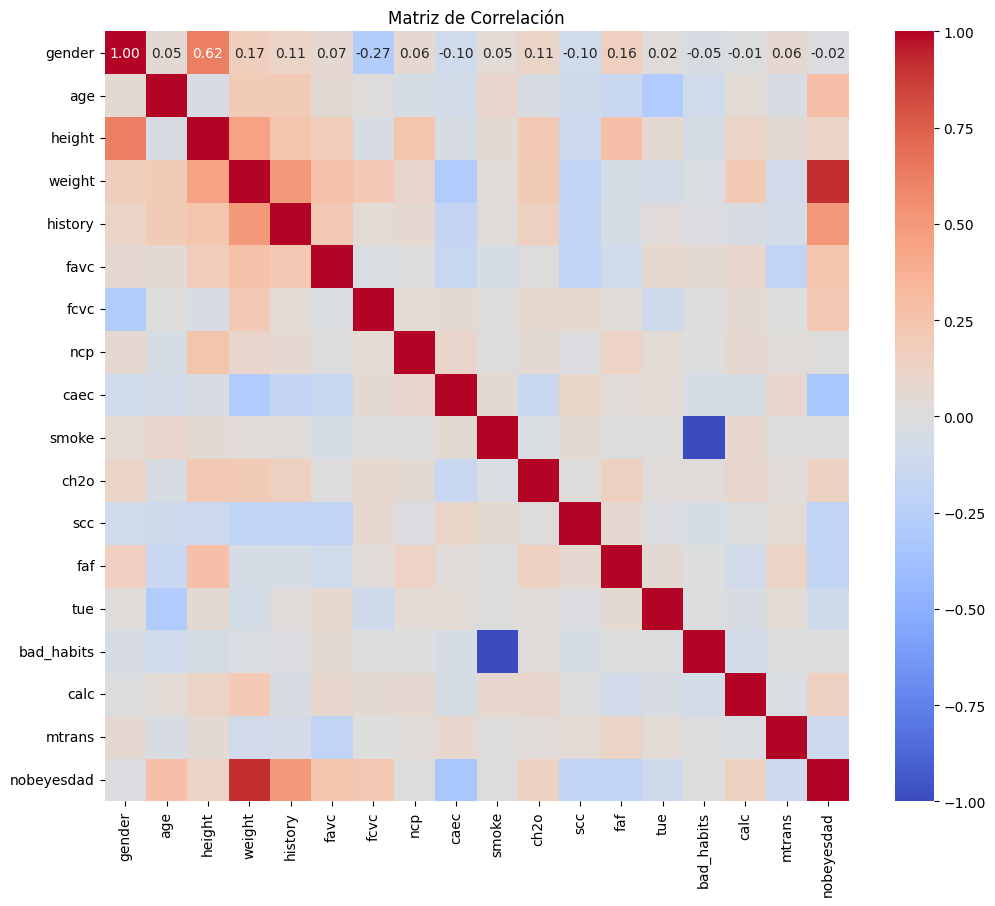

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = obesity.corr()

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de Correlación")
plt.show()

In [10]:
# Calcular la matriz de correlación
correlation_matrix = obesity.corr()

# Filtrar las variables con correlación mayor que 0.7 (o cualquier otro umbral deseado)
high_correlation_vars = correlation_matrix[abs(correlation_matrix) > 0.7].stack().reset_index()
high_correlation_vars = high_correlation_vars[high_correlation_vars['level_0'] != high_correlation_vars['level_1']]

# Mostrar las variables con correlación mayor que 0.7
print(high_correlation_vars)

       level_0     level_1         0
4       weight  nobeyesdad  0.914311
11       smoke  bad_habits -1.000000
16  bad_habits       smoke -1.000000
20  nobeyesdad      weight  0.914311


## Conclusión matriz de correlación

Claramente **smoke y bad habits** es lo mismo, habrá que quitar una de las dos.

Además, nos sale que weight está muy correlacionada con la variable objetivo.

*Con esto me entran dudas de qué información aporta weigth en realidad, es el peso el que define las categorías*


Bajando a 0.6 nos sale gender y heigth correlacionadas, se ve que no hay mucha correlación entre variables... **POR AHORA SÓLO QUITAMOS BAD_HABITS**

# **VIF**

## Cálculo

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
dfvif = obesity.drop('nobeyesdad', axis=1) #eliminamos la columna de la variable respuesta Y.
dfvif.shape[1] #hacemos la comprobación

17

In [12]:
def estandariza(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [13]:
dfvif_estan = dfvif.apply(estandariza, axis=0)
dfvif_estan.head()

,gender,age,height,weight,history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,bad_habits,calc,mtrans
0,-1.005398,-0.462036,-0.841002,-0.841267,0.478426,-2.758503,-0.781975,0.396865,-0.307573,-0.144992,-0.004204,-0.21688,-1.221300,0.539325,0.144992,-1.413163,-0.166081
1,0.994165,-0.144600,1.095332,-0.343828,0.478426,-2.758503,-0.781975,0.396865,-0.307573,-0.144992,-0.004204,-0.21688,1.116032,0.539325,0.144992,2.464186,-0.166081
2,0.994165,0.490272,1.095332,0.038818,-2.089208,-2.758503,1.088188,0.396865,-0.307573,-0.144992,-0.004204,-0.21688,1.116032,-1.094855,0.144992,2.464186,4.975197
3,0.994165,-0.303318,0.880184,0.145959,-2.089208,-2.758503,-0.781975,-2.168244,-0.307573,-0.144992,-0.004204,-0.21688,-1.221300,-1.094855,0.144992,0.525511,-0.166081
4,0.994165,0.807708,-0.841002,-1.262177,-2.089208,0.362346,-0.781975,0.396865,-0.307573,-0.144992,-0.004204,-0.21688,-1.221300,-1.094855,0.144992,0.525511,-0.166081


In [14]:
vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(dfvif.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan.sort_values(by=['VIF'],ascending=True)

c:\Users\usuario\anaconda3\envs\TFGr\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
16,mtrans,1.063022
11,scc,1.097699
7,ncp,1.101380
10,ch2o,1.118818
15,calc,1.121404
13,tue,1.136560
8,caec,1.189253
5,favc,1.189591
12,faf,1.212192
6,fcvc,1.223605


## Conclusión

Todos los valores del VIF dan muy bajos, tampoco eliminamos ninguna variable según el VIF.

# Selección univariante de variables predictoras (cuáles están más correlacionadas con la variable objetivo)

## Test T

### Cálculo

In [15]:
import statsmodels.api as sm

# Definir la variable dependiente Y
Y = obesity['nobeyesdad']

# Añadir una columna de unos como constante para X
X_with_const = sm.add_constant(obesity.drop(columns=['nobeyesdad']))

# Inicializar y ajustar el modelo de regresión lineal
model = sm.OLS(Y, X_with_const)
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             nobeyesdad   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2545.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:19:29   Log-Likelihood:                -1301.8
No. Observations:                2136   AIC:                             2638.
Df Residuals:                    2119   BIC:                             2734.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0415      0.172     35.099      0.0

Para valores de *p* $\le$ 0.05 consideramos que existe una relación lineal entre la variable predictora y la variable respuesta.

### Conclusión
Las variables con valores p superiores a 0.05 generalmente no se consideran estadísticamente significativas en el modelo. En tu resumen, las variables con valores p superiores a 0.05 son:

**CONSIDERARÍAMOS QUITAR:** **'favc', 'fcvc', 'ch2o', 'scc', 'tue' y 'mtrans'**
Estos valores p indican que no hay suficiente evidencia para rechazar la hipótesis nula de que los coeficientes de estas variables son iguales a cero. En otras palabras, no podemos decir con confianza que estas variables tienen un efecto significativo en la variable dependiente 'nobeyesdad' en este modelo.

## Select K Best R regression

## Cálculo

In [16]:
from sklearn.feature_selection import r_regression, SelectKBest
rselect = SelectKBest(r_regression, k=11) # Seleccionamos las mejores 4, 6 y 8 variables predictoras
rselect.fit_transform(X_with_const, Y)
rselect.transform(X_with_const).shape #comprobamos el número k en la posición del número de columnas

(2136, 11)

In [17]:
rfilter = rselect.get_support(indices=True) #la numeración de rfilter empieza en 0 en el mismo orden de columnas de X donde 0==x1 para OLS
print(rfilter)

[ 0  2  3  4  5  6  7  8 10 11 16]


In [18]:
from sklearn.preprocessing import StandardScaler #importamos la librería para estandarizar
scalerX = StandardScaler()
lista_columnas=obesity.columns[0:len(obesity.columns)-1]
obesity[lista_columnas] = scalerX.fit_transform(obesity[lista_columnas])

In [19]:
import numpy as np
scalerY = StandardScaler()
obesity['nobeyesdad']=scalerY.fit_transform(np.array(obesity['nobeyesdad']).reshape(len(obesity['nobeyesdad']),1)).reshape(len(obesity['nobeyesdad']))

In [20]:
#VARIABLES MÁS CORRELACIONADAS CON LA VARIABLE OBJETIVO
dflista_columnas=pd.DataFrame(lista_columnas)
dflista_columnas=dflista_columnas.rename(columns={0:'Variable predictora'})
dfKBest_r=dflista_columnas.iloc[rfilter, 0]
dfKBest_r

0      gender
2      height
3      weight
4     history
5        favc
6        fcvc
7         ncp
8        caec
10       ch2o
11        scc
16     mtrans
Name: Variable predictora, dtype: object

## Conclusión
Las variables menos correlacionadas y que **CONSIDERARÍAMOS QUITAR** serían **age, smoke y bad_habits, faf, tue y calc** (las restantes)

Entre estas y las de antes sólo coincide **tue**. Podríamos considerar tb **ch20, scc y mtrans,** que son las siguientes menos correlacionadas que coinciden con las anteriores

## Test F

### Cálculo

In [21]:
X = obesity.drop(['nobeyesdad'],axis=1).values
Y = obesity['nobeyesdad'].values

In [22]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, Y)
#psorted_values = p_values.sort()
#fsorted_values = f_values.sort()
#print("Los valores de p:", p_values)
print("Los valores de F:", f_values)

Los valores de F: [9.65768564e-01 1.81460285e+02 3.06822939e+01 1.08753245e+04
 7.36830069e+02 1.33974171e+02 1.08371145e+02 3.99208111e-01
 2.68951705e+02 7.76779227e-02 3.95028749e+01 7.79851819e+01
 7.97028693e+01 2.47343263e+01 7.76779227e-02 5.32415848e+01
 3.54369717e+01]


In [23]:
#dfp_values=pd.DataFrame(p_values)
#dfp_values=dfp_values.rename(columns = {0:'p'})
dff_values=pd.DataFrame(f_values)
dff_values=dff_values.rename(columns = {0:'F'})
dflista_columnasTestF=pd.DataFrame(lista_columnas)
dflista_columnasTestF=dflista_columnasTestF.rename(columns={0:'Variable predictora'})
#dflista_columnasTestF=dflista_columnasTestF.rename(columns={0:'Variable predictora'}).join(dfp_values).join(dff_values)
dflista_columnasTestF=dflista_columnasTestF.rename(columns={0:'Variable predictora'}).join(dff_values)
dflista_columnasTestF

,Variable predictora,F
0,gender,0.965769
1,age,181.460285
2,height,30.682294
3,weight,10875.324474
4,history,736.830069
5,favc,133.974171
6,fcvc,108.371145
7,ncp,0.399208
8,caec,268.951705
9,smoke,0.077678


In [24]:
dflista_columnasTestF[dflista_columnasTestF['F'] < 30]

,Variable predictora,F
0,gender,0.965769
7,ncp,0.399208
9,smoke,0.077678
13,tue,24.734326
14,bad_habits,0.077678


### **Conclusión**
cuanto mayor es el valor de F mayor es la relación entre la variable predictora y la variable respuesta.

Poca relación (**consideramos quitar**): **bad_habits, smoke, ncp, gender y tue**

## Select K Best F regression

### Cálculo

In [25]:
from sklearn.feature_selection import SelectKBest
fselect = SelectKBest(f_regression, k=11) # Seleccionamos las mejores 4, 6 y 8 variables predictoras
fselect.fit_transform(X,Y)
fselect.transform(X).shape

(2136, 11)

In [26]:
ffilter = fselect.get_support(indices=True)
print(ffilter) #ffilter muestra las variables seleccionadas en el mismo orden de columnas de X

[ 1  3  4  5  6  8 10 11 12 15 16]


In [27]:
dfKBest_f=dflista_columnas.iloc[ffilter, 0]
dfKBest_f

1         age
3      weight
4     history
5        favc
6        fcvc
8        caec
10       ch2o
11        scc
12        faf
15       calc
16     mtrans
Name: Variable predictora, dtype: object

### Conclusión
LAS VARIABLES QUE CONISDERAMOS QUTIAR (LAS QUE QUEDAN): **gender, heigth, ncp, smoke, tue, bad habits**

# CONCLUSIÓN GENERAL
**Tue** se repite en las cuatro: eliminarla
**Bad_habits** y **smole** en 3 de 4: eliminarlas (una la teníamos que eliminar seguro).


# RFE selección recursiva de variables

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
lr= LinearRegression()
#vamos a ensayar con min_features_to_select=4, 6 y 8 y cv=10
rfecv = RFECV(lr, step=1, min_features_to_select=4, cv=10)
rfecv.fit(X, Y)
rfecv.transform(X).shape

(2136, 8)

In [29]:
rfecvfilter = rfecv.get_support(indices=True)
print(rfecvfilter)

[ 0  1  2  3  4  8 12 15]


In [30]:
dfrfecv=dflista_columnas.iloc[rfecvfilter, 0]
dfrfecv

0      gender
1         age
2      height
3      weight
4     history
8        caec
12        faf
15       calc
Name: Variable predictora, dtype: object

# SFS selección secuencial de variables

In [31]:
from sklearn.feature_selection import SequentialFeatureSelector
lr= LinearRegression()
#ensayamos con n_features_to_select= 4, 6, 8 backward y forward
sfs = SequentialFeatureSelector(lr, n_features_to_select=4, scoring= 'r2', direction='backward') #NB: direction{‘forward’, ‘backward’}, default=’forward’
sfs.fit(X, Y)
sfs.transform(X).shape

(2136, 4)

In [32]:
sfsfilter = sfs.get_support(indices=True)
print(sfsfilter)

[1 2 3 4]


In [33]:
dfsfs=dflista_columnas.iloc[sfsfilter, 0]
dfsfs

1        age
2     height
3     weight
4    history
Name: Variable predictora, dtype: object

concuerda con lo anterior

#CONCLUSIÓN
Confirmamos que ni **tue**, ni **smoke**, ni **bad_habits** entran entre las elegidas por selección recursiva.
**Ncp**, que aparecía dos veces como no correlacionada con la objetivo podemos considerar quitarla si eso.

ELIMINAR POR ORDEN: bad_habits fijo porque es igual que smoke. luego tue que sale en todos lados como no importante. Luego smoke, porque también en 3/4 como no importante y confirmado por selección recursiva y secuencial. Ncp también sale dos veces y luego en rfe y sfs no sale así que se puede plantear.

# **PCA**

In [34]:
from sklearn.decomposition import PCA
import pandas as pd

# Seleccionar las características del dataframe (excluir la variable objetivo)
X = obesity.drop(columns=['nobeyesdad'])

# Normalizar las características si es necesario (opcional)
# Esto es importante para PCA ya que es sensible a la escala de las características
# Puedes usar StandardScaler o MinMaxScaler para normalizar las características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Obtener los nombres de las características originales
nombres_caracteristicas = X.columns

# Obtener los pesos de las variables originales en cada componente principal
componentes_principales = pca.components_

# Crear un DataFrame para visualizar los pesos de las variables en cada componente principal
df_componentes = pd.DataFrame(componentes_principales, columns=nombres_caracteristicas)

# Visualizar los pesos de las variables en cada componente principal
print("Pesos de las variables en cada componente principal:")
print(df_componentes)

# Obtener la variabilidad explicada por cada componente principal
var_explicada = pca.explained_variance_ratio_

# Visualizar la variabilidad explicada por cada componente principal
print("\nVariabilidad explicada por cada componente principal:")
for i, var in enumerate(var_explicada):
    print(f"Componente principal {i+1}: {var:.2f}")

# Identificar las variables que contribuyen más a cada componente principal
print("\nVariables que contribuyen más a cada componente principal:")
for i, componente in enumerate(componentes_principales):
    # Obtener el índice de la característica con el peso máximo en el componente
    indice_max = componente.argmax()
    # Obtener el nombre de la característica correspondiente al índice máximo
    variable_max = nombres_caracteristicas[indice_max]
    print(f"Componente principal {i+1}: {variable_max} (peso: {componente[indice_max]:.2f})")

Pesos de las variables en cada componente principal:
          gender           age        height        weight       history  \
0  -3.361235e-01 -1.502463e-01 -4.589842e-01 -4.849748e-01 -3.812363e-01   
1   2.004318e-02  8.064404e-02  1.451833e-02 -5.358829e-02 -6.204891e-02   
2   3.494705e-01 -3.699893e-01  3.519828e-01 -1.878675e-01 -1.726769e-01   
3  -3.049741e-01 -5.265057e-02  1.130764e-02  2.077082e-01  1.719490e-02   
4   2.862998e-01  4.927097e-01  5.751986e-02 -4.400789e-02 -3.857275e-02   
5  -1.999825e-02 -1.517480e-01 -1.473008e-01  5.591076e-03  4.342398e-02   
6   1.643811e-01 -6.320543e-02  8.652633e-02 -5.066523e-02 -4.437704e-01   
7  -7.441366e-02  2.185898e-02 -4.939210e-02  8.685041e-02  6.851683e-02   
8   6.899160e-02  1.380132e-01 -2.405299e-02  5.453746e-02  3.714540e-01   
9   2.067202e-01 -5.884153e-02  2.371588e-01  1.399662e-01 -6.564044e-03   
10 -6.186500e-02 -7.487266e-02 -3.939243e-02  1.025608e-01 -2.033027e-02   
11 -2.131711e-01  3.801989e-01 -1.5

Vale entonces eliminar smoke mejor no, pero tue y bad_habits SÍ.